In [34]:
# import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
# read in csv as dataframe
df = pd.read_csv("Data/county_statistics.csv", index_col=0)
df.head()

,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Abbeville,SC,0.629,0.346,10724,6742,3712,0.661,0.330,12433.0,...,1.8,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4
1,Acadia,LA,0.773,0.206,27386,21159,5638,0.795,0.191,28425.0,...,1.6,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9
2,Accomack,VA,0.545,0.428,15755,8582,6737,0.542,0.447,16938.0,...,2.6,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4
3,Ada,ID,0.479,0.387,195587,93748,75676,0.504,0.465,259389.0,...,1.5,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3
4,Adair,IA,0.653,0.300,3759,2456,1127,0.697,0.286,4183.0,...,2.8,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0


In [3]:
# check columns
df.columns

Index(['county', 'state', 'percentage16_Donald_Trump',
       'percentage16_Hillary_Clinton', 'total_votes16', 'votes16_Donald_Trump',
       'votes16_Hillary_Clinton', 'percentage20_Donald_Trump',
       'percentage20_Joe_Biden', 'total_votes20', 'votes20_Donald_Trump',
       'votes20_Joe_Biden', 'lat', 'long', 'cases', 'deaths', 'TotalPop',
       'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr', 'IncomePerCap',
       'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit',
       'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed',
       'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork',
       'Unemployment'],
      dtype='object')

In [4]:
# drop unnecessary rows for analysis
df = df.drop(['percentage16_Donald_Trump', 'percentage16_Hillary_Clinton', 'total_votes16', 'votes16_Donald_Trump', 'votes16_Hillary_Clinton', 'lat', 'long', 'deaths'], axis = 1)
df.columns

Index(['county', 'state', 'percentage20_Donald_Trump',
       'percentage20_Joe_Biden', 'total_votes20', 'votes20_Donald_Trump',
       'votes20_Joe_Biden', 'cases', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [5]:
# drop rows with null values and check if there are any nulls in columns after
df = df.dropna(axis = 0, how = 'any')
df.isnull().sum()

county                       0
state                        0
percentage20_Donald_Trump    0
percentage20_Joe_Biden       0
total_votes20                0
votes20_Donald_Trump         0
votes20_Joe_Biden            0
cases                        0
TotalPop                     0
Men                          0
Women                        0
Hispanic                     0
White                        0
Black                        0
Native                       0
Asian                        0
Pacific                      0
VotingAgeCitizen             0
Income                       0
IncomeErr                    0
IncomePerCap                 0
IncomePerCapErr              0
Poverty                      0
ChildPoverty                 0
Professional                 0
Service                      0
Office                       0
Construction                 0
Production                   0
Drive                        0
Carpool                      0
Transit                      0
Walk    

In [6]:
# Check datatypes
df.dtypes

county                        object
state                         object
percentage20_Donald_Trump    float64
percentage20_Joe_Biden       float64
total_votes20                float64
votes20_Donald_Trump         float64
votes20_Joe_Biden            float64
cases                        float64
TotalPop                     float64
Men                          float64
Women                        float64
Hispanic                     float64
White                        float64
Black                        float64
Native                       float64
Asian                        float64
Pacific                      float64
VotingAgeCitizen             float64
Income                       float64
IncomeErr                    float64
IncomePerCap                 float64
IncomePerCapErr              float64
Poverty                      float64
ChildPoverty                 float64
Professional                 float64
Service                      float64
Office                       float64
C

In [7]:
# separate string columns in separate df to be merged after using model
counties_df = df[['county', 'state']]
counties_df.head()

,county,state
0,Abbeville,SC
1,Acadia,LA
2,Accomack,VA
3,Ada,ID
4,Adair,IA


In [8]:
# drop string columns to only input integers into model
df = df.drop(['county', 'state'], axis = 1)
df.head()

,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,votes20_Donald_Trump,votes20_Joe_Biden,cases,TotalPop,Men,Women,Hispanic,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0.661,0.330,12433.0,8215.0,4101.0,805.0,24788.0,12044.0,12744.0,1.3,...,1.8,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4
1,0.795,0.191,28425.0,22596.0,5443.0,3182.0,62607.0,30433.0,32174.0,2.4,...,1.6,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9
2,0.542,0.447,16938.0,9172.0,7578.0,1227.0,32840.0,16079.0,16761.0,8.8,...,2.6,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4
3,0.504,0.465,259389.0,130699.0,120539.0,17451.0,435117.0,217999.0,217118.0,7.9,...,1.5,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3
4,0.697,0.286,4183.0,2917.0,1197.0,222.0,7192.0,3552.0,3640.0,1.7,...,2.8,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0


In [13]:
# select cases as target
y = df.cases

In [14]:
# create features and drop target
X = df.drop(['cases'], axis = 1)

In [15]:
# instantiate model
model = LinearRegression()

In [16]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48)

In [17]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Make and view predictions
y_pred = model.predict(X_train)
y_pred[:5]

array([426.09403699, 631.58989066, 155.25579963, 328.49074649,
       857.94541769])

In [23]:
# Check model's accuracy (1 is highest)
model.score(X_train,y_train)

0.9518920969540877

In [29]:
print(f"shape of X is {X_train.shape}, shape of y is {y_train.shape}")

shape of X is (2284, 39), shape of y is (2284,)


ValueError: x and y must be the same size

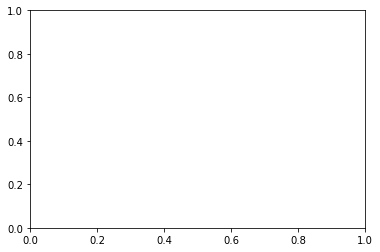

In [30]:
# How to plot multiple linear regression?
plt.scatter(X_train, y_train)
plt.plot(X, y_pred, color='red')
plt.show()

In [35]:
# trying Gaussian Naive Bayes classifier
nb_model = GaussianNB()

In [36]:
# fit nb model
nb_model.fit(X_train, y_train)

GaussianNB()

In [37]:
# Make predictions using nb model
nb_predict = nb_model.predict(X_train)
nb_predict[:5]

array([ 337., 1572.,  320.,   27.,  939.])

In [38]:
# check score
nb_model.score(X_train, y_train)

0.6401050788091068